In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/kaggle/input/xlm-embeddings-daigt-v4-dataset/preprocessed_daigt_v4_with_XLM_embeddings.csv')

# Convert the string of embeddings into a list of floats by removing brackets and commas
df['XLMRoberta_embeddings'] = df['XLMRoberta_embeddings'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

# Display the first row to confirm the format
print(df[['cleaned_text', 'XLMRoberta_embeddings']].head())

                                        cleaned_text  \
0  phone modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  driving use cellular device today society thou...   
3  phone driving driver able use phone operating ...   
4  cell phone operation driving ability stay conn...   

                               XLMRoberta_embeddings  
0  [0.071952045, 0.0980984718, 0.0509701595, -0.0...  
1  [0.0791621432, 0.0825015828, 0.0429741591, -0....  
2  [0.084758617, 0.0898163319, 0.0599144138, -0.0...  
3  [0.0886452571, 0.0827930123, 0.0505732223, -0....  
4  [0.0733705834, 0.0969636664, 0.0513726994, -0....  


In [4]:
# Prepare the feature matrix (X) and labels (y)
X = np.vstack(df['XLMRoberta_embeddings'].values)  # Stack embeddings into a 2D array
y = df['label']  # Replace 'label' with the actual name of your label column if different

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
!pip install xgboost

In [8]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier with optimized parameters
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

In [9]:
# Lists to store accuracy at each iteration
train_accuracies = []
test_accuracies = []

In [10]:
for i in range(1, xgb.n_estimators + 1):
    xgb.set_params(n_estimators=i)  # Incrementally increase the number of estimators
    xgb.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    train_pred = xgb.predict(X_train)
    test_pred = xgb.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [11]:
train_accuracies

[0.627255428319005,
 0.627255428319005,
 0.627255428319005,
 0.627255428319005,
 0.627255428319005,
 0.7640932413605627,
 0.8269224234598526,
 0.8492473410581399,
 0.8646743008596962,
 0.8756158890889939,
 0.8845526521458426,
 0.8906860579700295,
 0.8963777226545244,
 0.9004723232185939,
 0.9033776207142614,
 0.9064358286044378,
 0.908831424785076,
 0.9101736382479867,
 0.9121274932889327,
 0.9137925175846954,
 0.9142512487682218,
 0.9155255020557953,
 0.917241496483061,
 0.9185327398144687,
 0.9197730130143735,
 0.9206904753814265,
 0.921913758537497,
 0.9220836589758401,
 0.9229501512113901,
 0.924139454279792,
 0.9246661456386558,
 0.9254476876550342,
 0.9263141798905841,
 0.9265010703727615,
 0.9273165924768086,
 0.9276903734411635,
 0.9284209453260389,
 0.9290155968602399,
 0.9292874375615889,
 0.9297971388766183,
 0.9302558700601448,
 0.9307315912875055,
 0.9311563423833633,
 0.932005844575079,
 0.9325155458901084,
 0.9329742770736349,
 0.9330252472051378,
 0.9339427095721907,
 0

In [12]:
test_accuracies

[0.6309208290859667,
 0.6309208290859667,
 0.6309208290859667,
 0.6309208290859667,
 0.6309208290859667,
 0.7586816173972137,
 0.8208630648997621,
 0.8388718994223582,
 0.8517838939857288,
 0.8614339109751954,
 0.8683656133197417,
 0.872239211688753,
 0.8781515460414543,
 0.8812096500169895,
 0.8829765545361876,
 0.8866462793068298,
 0.8893645939517499,
 0.8904519198097179,
 0.8922867821950391,
 0.8932381923207612,
 0.8945973496432212,
 0.8952089704383283,
 0.8971797485558953,
 0.8990825688073395,
 0.8997621474685695,
 0.9011892626571526,
 0.9011213047910296,
 0.9018688413183826,
 0.9030920829085967,
 0.9039755351681957,
 0.9043153244988107,
 0.9047230716955488,
 0.9055385660890248,
 0.9062861026163779,
 0.9065579340808698,
 0.9068297655453619,
 0.9075773020727149,
 0.9081889228678219,
 0.908936459395175,
 0.909480122324159,
 0.9107713217804961,
 0.9111111111111111,
 0.9112470268433571,
 0.9115868161739722,
 0.9122663948352022,
 0.9124023105674481,
 0.9133537206931702,
 0.9134896364254

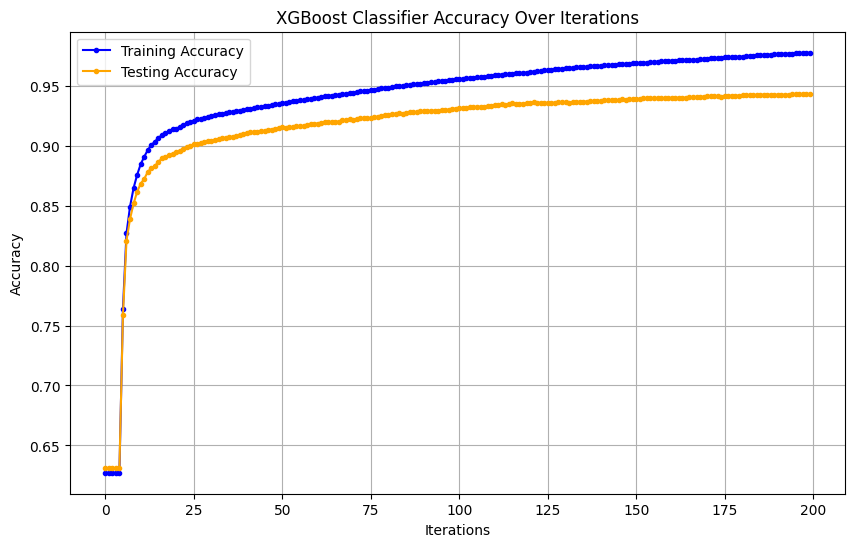

In [13]:
# Plot accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [14]:
# Make predictions on the test set
y_pred = xgb.predict(X_test)

In [15]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [16]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5431
           1       0.96      0.94      0.95      9284

    accuracy                           0.94     14715
   macro avg       0.94      0.94      0.94     14715
weighted avg       0.94      0.94      0.94     14715



In [21]:
import matplotlib.pyplot as plt

# Initialize XGBClassifier with eval_metric in the constructor
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

# Initialize an empty dictionary to store evaluation results
evals_result = {}

# Fit the model with eval_set to track log loss over iterations
xgb.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=False)

# Extract log loss from the evaluation result
train_losses = xgb.evals_result()['validation_0']['logloss']
test_losses = xgb.evals_result()['validation_1']['logloss']


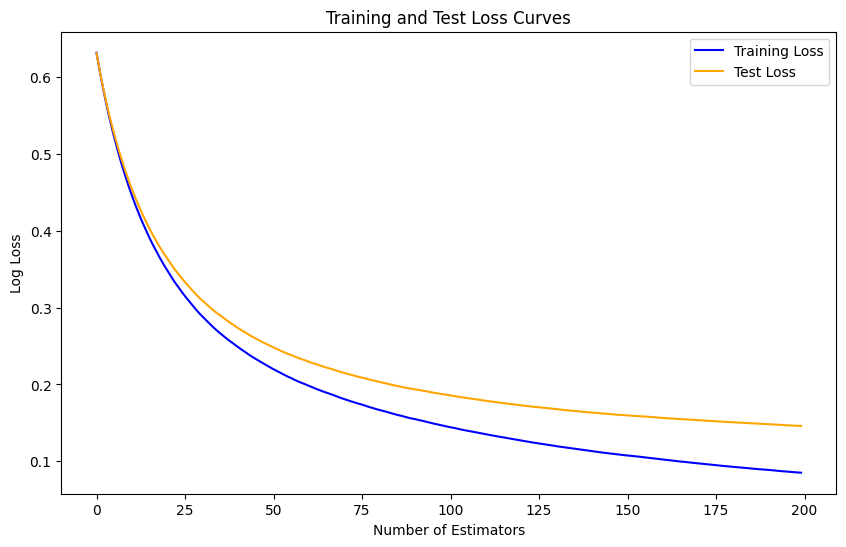

In [22]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Training and Test Loss Curves")
plt.legend()
plt.show()

In [25]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Train Accuracy': train_accuracies,
    'Train Loss': train_losses,
    'Test Accuracy': test_accuracies,
    'Test Loss': test_losses
})


# Display the DataFrame as a table with borders
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+-----+------------------+--------------+-----------------+-------------+
|     |   Train Accuracy |   Train Loss |   Test Accuracy |   Test Loss |
+=====+==================+==============+=================+=============+
|   0 |         0.627255 |    0.631733  |        0.630921 |    0.631152 |
+-----+------------------+--------------+-----------------+-------------+
|   1 |         0.627255 |    0.605665  |        0.630921 |    0.606062 |
+-----+------------------+--------------+-----------------+-------------+
|   2 |         0.627255 |    0.581975  |        0.630921 |    0.583291 |
+-----+------------------+--------------+-----------------+-------------+
|   3 |         0.627255 |    0.560095  |        0.630921 |    0.562333 |
+-----+------------------+--------------+-----------------+-------------+
|   4 |         0.627255 |    0.540014  |        0.630921 |    0.543138 |
+-----+------------------+--------------+-----------------+-------------+
|   5 |         0.764093 |    0.521587

In [26]:
# Sample classification report data
report = {
    'Human-Written': {'precision': 0.91, 'recall': 0.94, 'f1-score': 0.92, 'support': 5431},
    'Machine-Generated': {'precision': 0.96, 'recall': 0.94, 'f1-score': 0.95, 'support': 9284}
}

In [27]:
# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).T

In [28]:
# Plotting
labels = report_df.index
x = np.arange(len(labels))  # The label locations

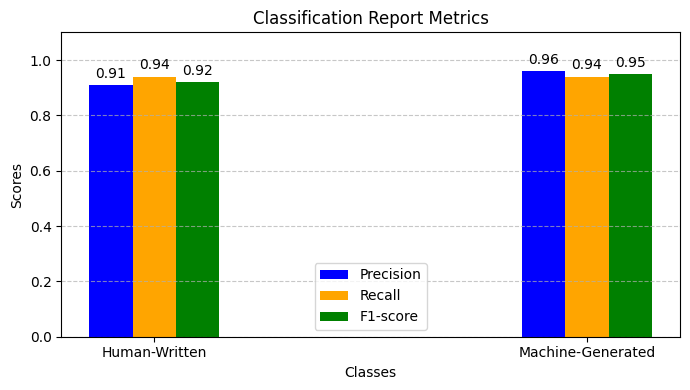

In [29]:
# Set width of the bars
width = 0.10

fig, ax = plt.subplots(figsize=(7, 4))

# Create bars for precision, recall, and F1-score
bars1 = ax.bar(x - width, report_df['precision'], width, label='Precision', color='blue')
bars2 = ax.bar(x, report_df['recall'], width, label='Recall', color='orange')
bars3 = ax.bar(x + width, report_df['f1-score'], width, label='F1-score', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value annotations on top of the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bars1)
add_value_annotations(bars2)
add_value_annotations(bars3)

plt.ylim(0, 1.1)  # Set y-axis limit to give space for annotations
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()